In [1]:
from transformers import pipeline
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
from transformers import LongformerTokenizer, LongformerForSequenceClassification, EncoderDecoderModel, LongformerConfig, LongformerTokenizerFast
import numpy as np
import matplotlib.pyplot as plt


/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting up Dataset

In [27]:
file_path= "../datasets/2022_newyork_activities.csv"
column_name= "text"
df= pd.read_csv(file_path)
print(len(df))

4119


In [28]:
print(df.columns.values.tolist())

['text', 'edit_history_tweet_ids', 'entities', 'lang', 'geo', 'id', 'created_at', 'context_annotations', 'author_id']


In [29]:
if len(df)>1000:
    tweets_subset = df.head(1000)
    tweets= tweets_subset[column_name].tolist()
else:
    tweets= df[column_name].tolist()


In [30]:
X_train= [str(value) for value in tweets]

## Initializing Tokenizer and Different Models for Testing

In [6]:
tokenizer = LongformerTokenizerFast.from_pretrained("allenai/longformer-base-4096", max_length=512, padding=True, truncation=True)

model1= AutoModelForSequenceClassification.from_pretrained('adam-chell/tweet-sentiment-analyzer')
model2= AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model3= AutoModelForSequenceClassification.from_pretrained('j-hartmann/sentiment-roberta-large-english-3-classes')
model4= AutoModelForSequenceClassification.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')


Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Model 1 (adam-chell.tweet-sentiment-analyzer)

In [31]:
resultinglabels1={}
classifier= pipeline('sentiment-analysis', model= model1, tokenizer= tokenizer)
# print(len(X_train))
for s in X_train:
    try:
        resultinglabels1[s]= classifier(s, truncation=True)
    except Exception as e:
        resultinglabels1[s]= np.nan
        continue

print(resultinglabels1)
labels1=[]
scores1=[]
for key, value in resultinglabels1.items():
    try:
        labels1.append(value[0]['label'])
        scores1.append(value[0]['score'])
    except Exception as e:
        labels1.append(np.nan)
        scores1.append(np.nan)
        continue
print(labels1)
print(scores1)
positive_count = labels1.count('POS')
negative_count = labels1.count('NEG')



323 169


/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_47435/3276310362.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=percentages, palette=['green', 'red'])


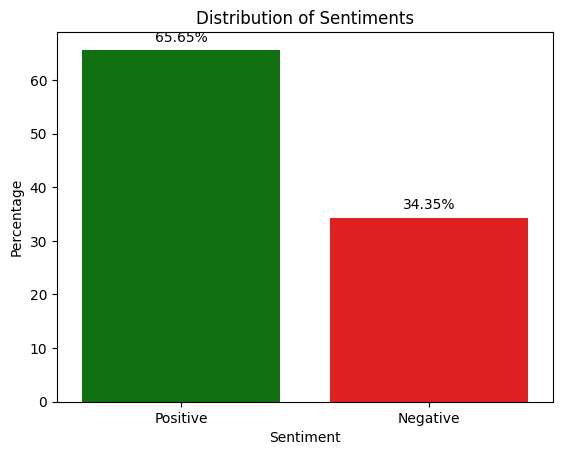

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

x = [0, 1]
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]
print(positive_count, negative_count)
# Calculate percentages
total_count = sum(counts)
percentages = [(count / total_count) * 100 for count in counts]

# Create a bar plot using Seaborn
sns.barplot(x=labels, y=percentages, palette=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Distribution of Sentiments')

# Display counts on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


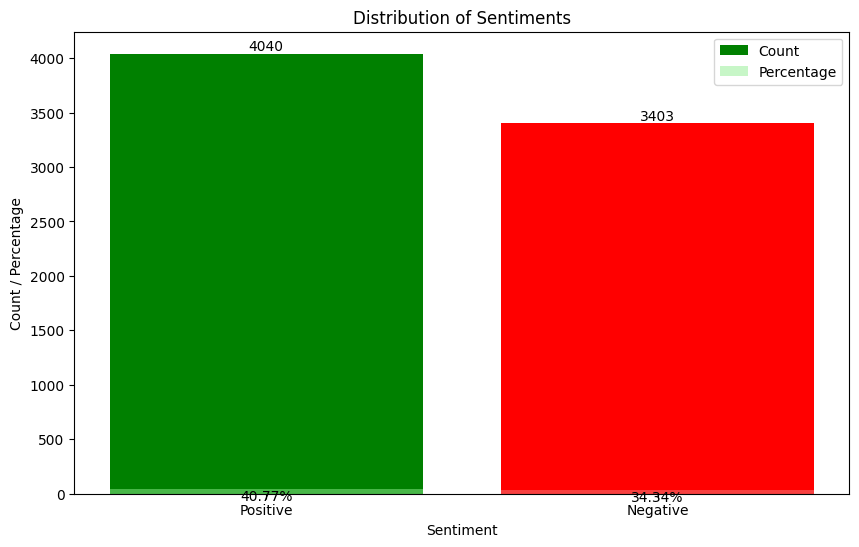

In [13]:
import matplotlib.pyplot as plt

# Assuming you have a list named labels1 containing sentiment labels (POS or NEG)
# Example:
# labels1 = ['POS', 'NEG', 'POS', 'POS', 'NEG', 'NEG']

positive_count = labels1.count('POS')
negative_count = labels1.count('NEG')
total_count = len(labels1)

# Calculate percentages
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

x = [0, 1]
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]
percentages = [positive_percentage, negative_percentage]

# Bar plot for counts
plt.figure(figsize=(10, 6))
plt.bar(x, counts, color=['green', 'red'], label='Count')

# Bar plot for percentages
plt.bar(x, percentages, color=['lightgreen', 'lightcoral'], label='Percentage', alpha=0.5)

plt.xticks(x, labels)
plt.xlabel('Sentiment')
plt.ylabel('Count / Percentage')
plt.title('Distribution of Sentiments')

# Display counts on top of bars
for i, count in enumerate(counts):
    plt.text(x[i], count, str(count), ha='center', va='bottom')

# Display percentages on top of percentage bars
for i, percentage in enumerate(percentages):
    plt.text(x[i], percentage, f'{percentage:.2f}%', ha='center', va='top')

plt.legend()
plt.show()


In [9]:
df_labels = pd.DataFrame({'sentiment': labels1})
df_scores = pd.DataFrame({'sentiment-score': scores1})

completedf= df_labels.join(df_scores)
completedf.to_csv('sentiment_task5.csv', index=False)


In [ ]:
print(df)

## Model 2 (nlptown/bert-base-multilingual-uncased-sentiment)

{'@DarkestJade69 I was fishing for ur attention ðŸ˜\x8f': [{'label': '3 stars', 'score': 0.35666704177856445}], "Don't like my hair la today urgh zzz": [{'label': '2 stars', 'score': 0.3381340801715851}], '@sihuicsh love you, enjoy your night okay? Take careðŸ˜—': [{'label': '1 star', 'score': 0.4180683195590973}], '#stgcc #stgcc2015 #cosplay #cosplayevent #sgcosplay #sgcosplayevent #sgevents #sg #singapore #MBSâ€¦ https://t.co/xQ7C5dQEtC': [{'label': '1 star', 'score': 0.3624383211135864}], 'a garota lÃ¡ da sala piranha me chamando agr no chat': [{'label': '1 star', 'score': 0.3031064569950104}], "I'm at sheryl's âœ¨ https://t.co/rRclwjjltJ": [{'label': '1 star', 'score': 0.4001408517360687}], 'Lol that house is mine in the future. Fuck you if you try to take my house bij. IM THE ONLY GRANDCHILD OF THE FAMILY. Zzz': [{'label': '1 star', 'score': 0.4311315715312958}], '2 JuanKarlos A Birthday Show Soon"': [{'label': '1 star', 'score': 0.3102024793624878}], 'Back pain is killing me:( ht

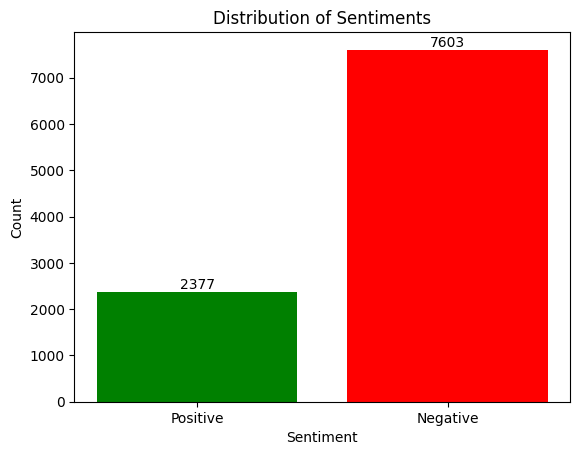

In [54]:
resultinglabels2={}

classifier= pipeline('sentiment-analysis', model= model2, tokenizer= tokenizer)
# print(len(X_train))
for s in X_train:
    try:
        resultinglabels2[s]= classifier(s, truncation=True)
    except Exception as e:
        resultinglabels2[s]= np.nan
        continue

print(resultinglabels2)
labels2=[]
for key, value in resultinglabels2.items():
    try:
        labels2.append(value[0]['label'])
    except Exception as e:
        labels2.append(np.nan)
        continue
print(labels2)

negative_count = labels2.count('1 star')+labels2.count('2 stars')
positive_count = labels2.count('3 stars')+ labels2.count('4 stars')+labels2.count('5 stars')

x=[0,1]
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(x, counts, color=['green', 'red'])

plt.xticks(x, labels)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

for i, count in enumerate(counts):
    plt.text(x[i], count, str(count), ha='center', va='bottom')
plt.show()

## Model 3 (j-hartmann/sentiment-roberta-large-english-3-classes)

{'@DarkestJade69 I was fishing for ur attention ðŸ˜\x8f': [{'label': 'neutral', 'score': 0.9984478950500488}], "Don't like my hair la today urgh zzz": [{'label': 'negative', 'score': 0.9988364577293396}], '@sihuicsh love you, enjoy your night okay? Take careðŸ˜—': [{'label': 'positive', 'score': 0.9995397329330444}], '#stgcc #stgcc2015 #cosplay #cosplayevent #sgcosplay #sgcosplayevent #sgevents #sg #singapore #MBSâ€¦ https://t.co/xQ7C5dQEtC': [{'label': 'neutral', 'score': 0.9983710646629333}], 'a garota lÃ¡ da sala piranha me chamando agr no chat': [{'label': 'neutral', 'score': 0.9911853671073914}], "I'm at sheryl's âœ¨ https://t.co/rRclwjjltJ": [{'label': 'neutral', 'score': 0.9980196952819824}], 'Lol that house is mine in the future. Fuck you if you try to take my house bij. IM THE ONLY GRANDCHILD OF THE FAMILY. Zzz': [{'label': 'negative', 'score': 0.9981850981712341}], '2 JuanKarlos A Birthday Show Soon"': [{'label': 'neutral', 'score': 0.9984706044197083}], 'Back pain is killing

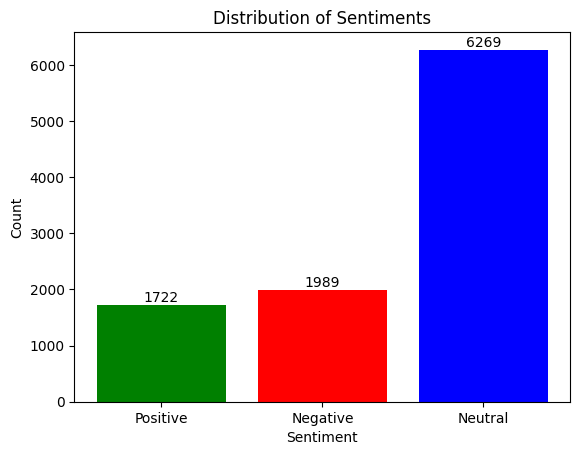

In [55]:
resultinglabels3={}

classifier= pipeline('sentiment-analysis', model= model3, tokenizer= tokenizer)
# print(len(X_train))
for s in X_train:
    try:
        resultinglabels3[s]= classifier(s, truncation=True)
    except Exception as e:
        resultinglabels3[s]= np.nan
        continue

print(resultinglabels3)

labels3=[]
for key, value in resultinglabels3.items():
    try:
        labels3.append(value[0]['label'])
    except Exception as e:
        labels3.append(np.nan)
        continue
print(labels3)

negative_count = labels3.count('negative')
positive_count = labels3.count('positive')
neutral_count= labels3.count('neutral')

x=[0,1, 2]
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]
plt.bar(x, counts, color=['green', 'red', 'blue'])

plt.xticks(x, labels)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

for i, count in enumerate(counts):
    plt.text(x[i], count, str(count), ha='center', va='bottom')
plt.show()

## Model 4 ('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')

{'@DarkestJade69 I was fishing for ur attention ðŸ˜\x8f': [{'label': 'neutral', 'score': 0.9998767375946045}], "Don't like my hair la today urgh zzz": [{'label': 'neutral', 'score': 0.998839795589447}], '@sihuicsh love you, enjoy your night okay? Take careðŸ˜—': [{'label': 'neutral', 'score': 0.9978577494621277}], '#stgcc #stgcc2015 #cosplay #cosplayevent #sgcosplay #sgcosplayevent #sgevents #sg #singapore #MBSâ€¦ https://t.co/xQ7C5dQEtC': [{'label': 'neutral', 'score': 0.9998326301574707}], 'a garota lÃ¡ da sala piranha me chamando agr no chat': [{'label': 'neutral', 'score': 0.999825656414032}], "I'm at sheryl's âœ¨ https://t.co/rRclwjjltJ": [{'label': 'neutral', 'score': 0.9998725652694702}], 'Lol that house is mine in the future. Fuck you if you try to take my house bij. IM THE ONLY GRANDCHILD OF THE FAMILY. Zzz': [{'label': 'neutral', 'score': 0.9998534917831421}], '2 JuanKarlos A Birthday Show Soon"': [{'label': 'neutral', 'score': 0.9998036026954651}], 'Back pain is killing me:(

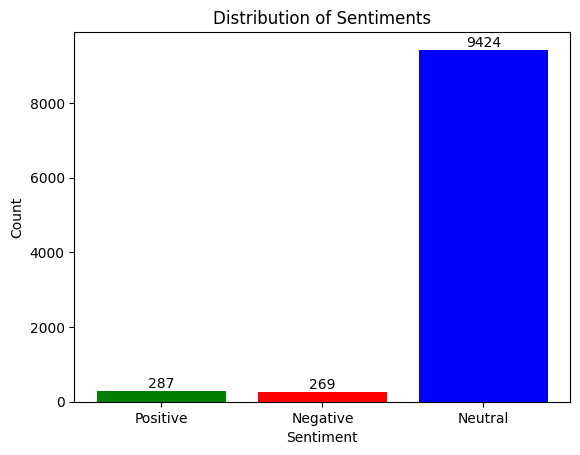

In [56]:
resultinglabels4={}

classifier= pipeline('sentiment-analysis', model= model4, tokenizer= tokenizer)
# print(len(X_train))
for s in X_train:
    try:
        resultinglabels4[s]= classifier(s, truncation=True)
    except Exception as e:
        resultinglabels4[s]= np.nan
        continue

print(resultinglabels4)

labels4=[]
for key, value in resultinglabels4.items():
    try:
        labels4.append(value[0]['label'])
    except Exception as e:
        labels4.append(np.nan)
        continue
print(labels4)

negative_count = labels4.count('negative')
positive_count = labels4.count('positive')
neutral_count= labels4.count('neutral')

x=[0,1, 2]
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]
plt.bar(x, counts, color=['green', 'red', 'blue'])

plt.xticks(x, labels)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

for i, count in enumerate(counts):
    plt.text(x[i], count, str(count), ha='center', va='bottom')
plt.show()

## Setting up Dataset for Modern Tweets

In [57]:
file_path2= "../datasets/task3_tweets.csv"
column_name2= "text"
df2= pd.read_csv(file_path2)
print(df2.columns.values.tolist())
tweets_subset2 = df2.sample(n=10000, random_state=100)
tweets2= tweets_subset2[column_name2].tolist()

X_train2= [str(value) for value in tweets2]

['Unnamed: 0', 'author_id', 'context_annotations', 'created_at', 'edit_history_tweet_ids', 'entities', 'geo', 'id', 'lang', 'text']


## Model 1 on the Modern Tweets Dataset

{'Citizens Bank Park will be rocking. Red October will be out in force.\r\n\r\nAnd we will be watching to see how the Phillies manage the late innings Monday.\r\n\r\nWhat other storylines bear monitoring in Game 6?\r\n\r\n📚 @MattGelb | @ByMcCullough ⤵️\r\n\r\nhttps://t.co/BRbO1xQFfj': [{'label': 'POS', 'score': 0.9488314986228943}], 'On this day in 1919 the old West-Cork Hurling Championship Final between @clongaa and @RossaGAA took place at the Town Park in Skibbereen, with the sides playing out a draw, both teams scored 2 goals and he lineups were as follows #corkhurlinghistory https://t.co/6np0h2li4x': [{'label': 'NEG', 'score': 0.7898234724998474}], 'Spending time in nature\r\n\r\neven a short walk in a park\r\n\r\ncan reduce feelings of stress, anxiety, and depression. \r\n\r\nNature is a healer; embrace it.': [{'label': 'POS', 'score': 0.6501232981681824}], "Grand Canyon National Park warns against 'love locks' as they pose a danger to condors https://t.co/IRjpEKBa1I via @azcentr

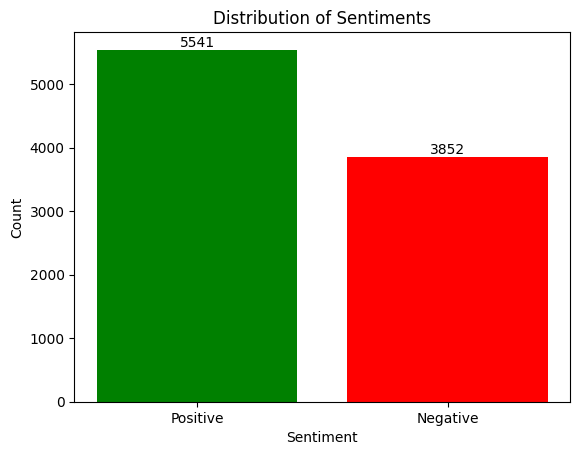

In [58]:
resultinglabels11={}
classifier= pipeline('sentiment-analysis', model= model1, tokenizer= tokenizer)
# print(len(X_train))
for s in X_train2:
    try:
        resultinglabels11[s]= classifier(s, truncation=True)
    except Exception as e:
        resultinglabels11[s]= np.nan
        continue

print(resultinglabels11)

labels11=[]
for key, value in resultinglabels11.items():
    try:
        labels11.append(value[0]['label'])
    except Exception as e:
        labels11.append(np.nan)
        continue
print(labels11)

positive_count = labels11.count('POS')
negative_count = labels11.count('NEG')

x=[0,1]
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(x, counts, color=['green', 'red'])

plt.xticks(x, labels)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

for i, count in enumerate(counts):
    plt.text(x[i], count, str(count), ha='center', va='bottom')
plt.show()

In [26]:
sentiment_export = pd.DataFrame({'sentiment': labels1,'sentimet-score': scores1})
# print(sentiment_export.shape)

# print(sentiment_export)
tbe_dataframe= pd.concat([tweets_subset, sentiment_export], axis=1)

# sentiment_export.to_excel('sentiment_melbourne_activities.xlsx', index=False)
sentiment_export.to_csv('sentiment_newyork_vals.csv', index=False)


In [61]:
print(X_train2[100])

see https://t.co/2aqJAJA1e0 Liddle Halloween Thriller Suspense Horror mode 2021 skeletal dog citizen decorations =Fake Dog Park? suspensful music ♫ scene of brave dog § entering skeleton-ridden ◢ DOGPARK ◣ video #WERatedogParks #Halloween recordings @ dgold © radio producer…


In [2]:
import pandas as pd

file_path= "../datasets/2022_seoul_activities.csv"
column_name= "text"

df= pd.read_csv(file_path)

print(len(df))

57


In [4]:
import numpy as np

a= np.array([[[1,2,3,4,5],[1,2,3,4,5]]])
print(np.shape(a))

(1, 2, 5)
